In [3]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



%matplotlib inline


In [4]:
import sys
sys.executable

'/home/manish/anaconda2/bin/python'

In [5]:
train_df = pd.read_csv("data/mnist/train.csv")
test_df = pd.read_csv("data/mnist/test.csv")

In [6]:
df = pd.DataFrame(train_df)
df.head(5)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df_X = train_df.drop("label",axis =1)

In [8]:
X_train = train_df_X.values
X_test  = test_df.values
y_train = train_df["label"].values

X_train.shape

(42000, 784)

In [10]:
X_train_images = X_train.reshape(-1,28,28)
X_train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

2


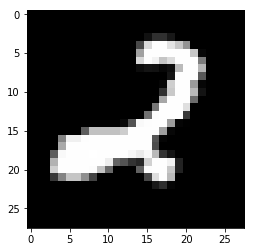

In [11]:
random_index = np.random.randint(0,len(y_train))

plt.imshow(X_train_images[random_index],cmap="gray")

print y_train[random_index]

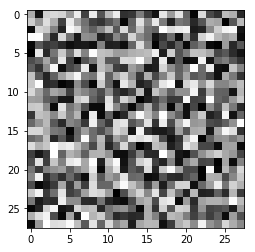

In [30]:
abc = np.random.randint(0,255,(28,28))

plt.imshow(abc, cmap="gray")

In [31]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [48]:
def create_model():
    
    #image_size = np.sqrt(784)
    
    m =Sequential()
    m.add(Dense(16,input_dim =784,activation="relu"))
    m.add(Dense(16,activation="relu"))
    m.add(Dense(16,activation="relu"))
    m.add(Dense(10,activation="softmax"))

#     model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))
#     model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
#     model.add(Dropout(0.1))
#     model.add(MaxPooling2D(pool_size=2))
#     model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
#     model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=2))
#     model.add(Dropout(0.2))
#     model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
#     model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
#     model.add(Dropout(0.3))
#     model.add(GlobalAveragePooling2D())
#     model.add(Dense(500, activation='relu'))
#     model.add(Dropout(0.4))
#     model.add(Dense(10, activation='softmax'))
    
    return m

In [49]:
model = create_model()

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                170       
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss="categorical_crossentropy",optimizer='rmsprop',metrics=["acc"]) #categorical_crossentropy #mse

In [51]:
from keras.utils import np_utils

y_lh = np_utils.to_categorical(y_train)

print y_lh.shape
print X_train.shape


(42000, 10)
(42000, 784)


In [52]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [53]:
history = model.fit(X_train,y_lh, epochs=200,batch_size=200)

Epoch 1/200
42000/42000 [==============================] - 4s 92us/step - loss: 1.7713 - acc: 0.5347
Epoch 2/200
42000/42000 [==============================] - 2s 36us/step - loss: 0.8993 - acc: 0.7591
Epoch 3/200
42000/42000 [==============================] - 2s 37us/step - loss: 0.6760 - acc: 0.8115
Epoch 4/200
42000/42000 [==============================] - 2s 37us/step - loss: 0.4744 - acc: 0.8641
Epoch 5/200
42000/42000 [==============================] - 2s 37us/step - loss: 0.3858 - acc: 0.8928
Epoch 6/200
42000/42000 [==============================] - 2s 37us/step - loss: 0.3376 - acc: 0.9089
Epoch 7/200
42000/42000 [==============================] - 2s 38us/step - loss: 0.3020 - acc: 0.9185
Epoch 8/200
42000/42000 [==============================] - 2s 39us/step - loss: 0.2812 - acc: 0.9227
Epoch 9/200
42000/42000 [==============================] - 2s 41us/step - loss: 0.2638 - acc: 0.9277
Epoch 10/200
42000/42000 [==============================] - 2s 37us/step - loss: 0.2506 - a

42000/42000 [==============================] - 2s 37us/step - loss: 0.1134 - acc: 0.9683
Epoch 82/200
42000/42000 [==============================] - 2s 37us/step - loss: 0.1134 - acc: 0.9688
Epoch 83/200
42000/42000 [==============================] - 2s 37us/step - loss: 0.1125 - acc: 0.9689
Epoch 84/200
42000/42000 [==============================] - 2s 37us/step - loss: 0.1101 - acc: 0.9693
Epoch 85/200
42000/42000 [==============================] - 2s 38us/step - loss: 0.1117 - acc: 0.9687
Epoch 86/200
42000/42000 [==============================] - 2s 37us/step - loss: 0.1122 - acc: 0.9700
Epoch 87/200
42000/42000 [==============================] - 2s 37us/step - loss: 0.1108 - acc: 0.9689
Epoch 88/200
42000/42000 [==============================] - 2s 37us/step - loss: 0.1113 - acc: 0.9690
Epoch 89/200
42000/42000 [==============================] - 2s 37us/step - loss: 0.1084 - acc: 0.9695
Epoch 90/200
42000/42000 [==============================] - 2s 37us/step - loss: 0.1086 - acc: 

42000/42000 [==============================] - 2s 37us/step - loss: 0.0941 - acc: 0.9750
Epoch 161/200
42000/42000 [==============================] - 2s 36us/step - loss: 0.0961 - acc: 0.9737
Epoch 162/200
42000/42000 [==============================] - 2s 36us/step - loss: 0.0977 - acc: 0.9735
Epoch 163/200
42000/42000 [==============================] - 2s 36us/step - loss: 0.0947 - acc: 0.9744
Epoch 164/200
42000/42000 [==============================] - 2s 37us/step - loss: 0.0985 - acc: 0.9740
Epoch 165/200
42000/42000 [==============================] - 2s 36us/step - loss: 0.0968 - acc: 0.9744
Epoch 166/200
42000/42000 [==============================] - 2s 36us/step - loss: 0.0956 - acc: 0.9747
Epoch 167/200
42000/42000 [==============================] - 2s 37us/step - loss: 0.0954 - acc: 0.9748
Epoch 168/200
42000/42000 [==============================] - 2s 36us/step - loss: 0.0937 - acc: 0.9748
Epoch 169/200
42000/42000 [==============================] - 2s 41us/step - loss: 0.093

In [55]:
def  vis(h):
    
    loss = h.history["loss"]
    plt.plot(loss)
    plt.grid()

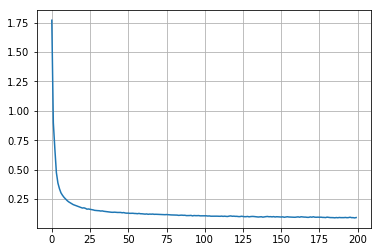

In [56]:
vis(history)

In [57]:


predictions = model.predict(X_test)

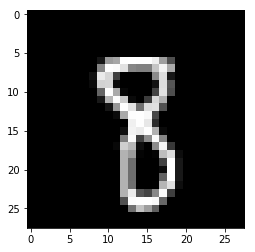

In [58]:
test_X_image = X_test.reshape(-1,28,28)

random_index = np.random.randint(0,len(X_test))

plt.imshow(test_X_image[random_index],cmap="gray")

In [59]:
print np.arange(10)

print predictions[random_index]

[0 1 2 3 4 5 6 7 8 9]
[  2.06489176e-06   1.94819132e-03   2.58362183e-04   1.61176994e-01
   1.18891819e-09   1.23614687e-02   2.24827072e-05   2.13432230e-10
   8.11078608e-01   1.31518152e-02]


In [60]:
output = np.round(model.predict(X_test),3)

output.shape


(28000, 10)

In [61]:
# create series 1 to 28,000
imageid = pd.Series(range(1,len(output)+1))

# output predicted image label
predictions_test = [np.argmax(out) for out in output]

In [62]:

# create dataframe to hold id and predicted label
df_output = pd.DataFrame({"ImageId":imageid,"Label":predictions_test})

df_output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,3
5,6,9
6,7,0
7,8,3
8,9,0
9,10,3


In [63]:
df_output.to_csv('data/mnist/predictions.csv',index=False)